# Spatial diffusion / smoothing example

The unit testing of `MeshArrays.jl` uses the `smooth()` function. Its effect on a random noise field is to "smooth it out". The average smoother efficiency is predictable and can be set via a `scale parameter`. The method as defined inside `MeshArrays.demo2` is applicable for any regular, `cube-sphere`, or `lat-lon-cap` Earth grid.

For more about how this diffusion based method works and behaves, please refer to **Weaver and Courtier, 2001.** Correlation modelling on the sphere using a generalized diffusion equation. https://doi.org/10.1002/qj.49712757518

#### Load  `MeshArrays` and `Plots`  modules

In [1]:
using MeshArrays, Plots
include(joinpath(dirname(pathof(MeshArrays)),"Plots.jl"))

Plots.contour

Grid the `6` faces of a cube with `16*16` points on each face. Distances, areas, etc. are all set to `1.0` for simplicity.

In [2]:
GridVariables=GridOfOnes("cs",6,16);

#### Diffuse a noisy field over the surface of a cube

In [3]:
DemoVariables=MeshArrays.demo2(GridVariables);

#### Display the 6 cube faces using  `heatmap`

The orignal noise field is `DemoVariables[1]` while the smoothed one
is `DemoVariables[2]`.

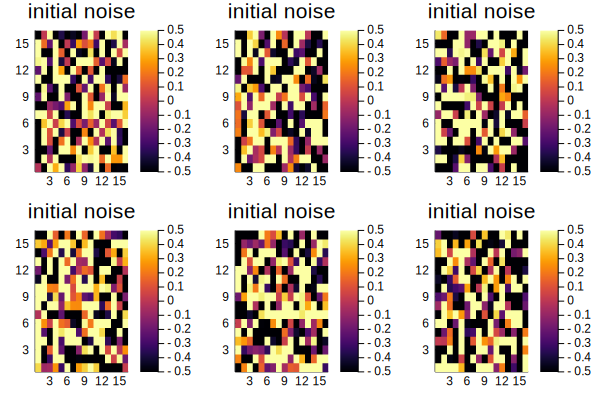

In [4]:
heatmap(DemoVariables[1],title="initial noise",clims=(-0.5,0.5))

After `smooth()` has been applied via `demo2()`, the noise is smoother and muted.

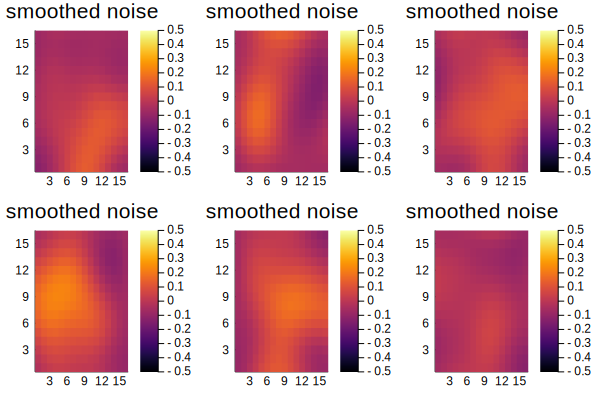

In [5]:
heatmap(DemoVariables[2],title="smoothed noise",clims=(-0.5,0.5))

The cost of applying `smooth()` predictably  increases with the decorrelation scale. For more about how this works, please refer to **Weaver and Courtier, 2001.** Correlation modelling on the sphere using a generalized diffusion equation. https://doi.org/10.1002/qj.49712757518

In [6]:
Rini=DemoVariables[1]
DXCsm=DemoVariables[3]
DYCsm=DemoVariables[4]
@time Rend=smooth(Rini,DXCsm,DYCsm,GridVariables);
@time Rend=smooth(Rini,2DXCsm,2DYCsm,GridVariables);

  0.002420 seconds (8.21 k allocations: 6.797 MiB)
  0.019325 seconds (30.69 k allocations: 24.272 MiB, 36.51% gc time)
